# Week 13 - 22/1/18

**OBJECTIVES**

- Change scaling to class $\checkmark$
- Use exponent scaling $\checkmark$
- Explore different scales

In [1]:
%load_ext autoreload
%autoreload 2

## Test new class structure with $\gamma$ scaling form

In [31]:
import matplotlib.pyplot as plt
from hm.analysis.scaling.plots import eps_distance
import hm.analysis.scaling.eps_scale
import pandas as pd

from hm.analysis.scaling.pop_hierarchy import pop_hier

### London

In [18]:
df = pd.read_csv("../../data/LSOA populations and areas 2011 (merged).csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [4]:
d_maxs = [300, 500, 700, 1000, 1300]
df = lon_df
N = 20 # number of bins

In [7]:
h = pop_hier(df, d_maxs)

In [8]:
eps = h.epsilon(2)

/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


In [11]:
DM = h.cluster_population(h.levels[1]).DM

In [14]:
eps

array([[  0.00000000e+00,   1.93752582e-01,   1.48190583e-01, ...,
         -1.23462084e-03,  -5.98583926e-03,  -3.61191993e-03],
       [  1.90446145e-01,   0.00000000e+00,   1.17470412e-01, ...,
         -5.36163873e-03,  -1.02289879e-02,  -7.88973052e-03],
       [  1.30111901e-01,   1.02485005e-01,   0.00000000e+00, ...,
          2.74900709e-04,  -5.40555211e-03,  -2.48659133e-03],
       ..., 
       [ -1.05749544e-01,  -1.05765878e-01,  -8.08191965e-02, ...,
          0.00000000e+00,   2.14393417e-01,   2.93022992e-01],
       [ -1.18103628e-01,  -1.18230428e-01,  -9.38920137e-02, ...,
          2.08228575e-01,   0.00000000e+00,   2.70896582e-01],
       [ -1.26915403e-01,  -1.27089915e-01,  -1.01923140e-01, ...,
          2.79633877e-01,   2.64562154e-01,   0.00000000e+00]])

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


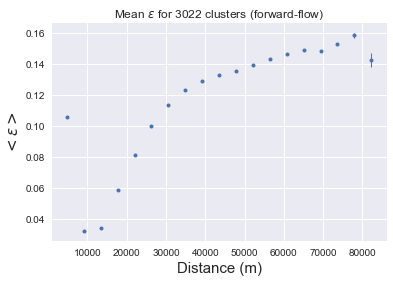

In [12]:
eps_distance(abs(eps), DM, N)

This looks quite different, probably because the exponent has changed quite dramatically? $\gamma$ is much smaller now so the effect of the further clusters is greater. Need to test it with the same exponent to make sure.

In [8]:
h2 = pop_hier(df, d_maxs) # I modified the class to just set gamma = 3.49 (as it was before)

In [9]:
eps = h2.epsilon(2)

/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


In [15]:
DM = h2.cluster_population(h2.levels[1]).DM

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


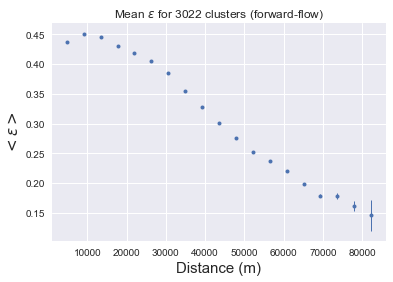

In [16]:
eps_distance(abs(eps), DM, N)

Ok so this is good, it tells us that the class form gives the same results. Now will change the gamma form back to what it was.

### Manchester & Liverpool

Recalculating the epsilon from the previous week

In [22]:
man_liv_df = df[(df['Easting'] < 411155) & (df['Easting'] > 315165)][(df['Northing'] < 427723) & (df['Northing'] > 359983)]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [25]:
d_maxs = [300, 500, 700, 1000, 1300]
level = 3
gamma = 3.49
df2 = man_liv_df
N = 20 # number of bins

In [27]:
h3 = pop_hier(df2, d_maxs)

In [28]:
eps = h3.epsilon(3)

100%|██████████| 3705/3705 [01:08<00:00, 54.04it/s]
/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


In [29]:
DM = h3.cluster_population(h3.levels[1]).DM

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


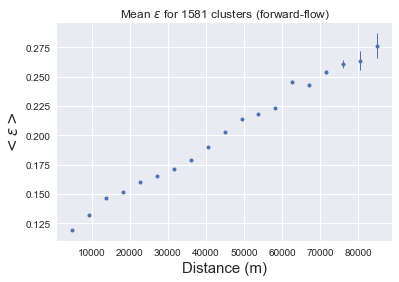

In [32]:
eps_distance(abs(eps), DM, N)